<a href="https://colab.research.google.com/github/A-Alviento/mlda-deep-learning-week-hackathon/blob/main/fake_news_detector_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library Imports**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# tokenizer used to tokenize data
from tensorflow.keras.preprocessing.text import Tokenizer
# pad sequence used to pad datasets which are not long enough, need to pad for constant len input
from tensorflow.keras.preprocessing.sequence import pad_sequences
# sequential model to feeding our model layers
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
# train test split is to split data sets into training set and test set
from sklearn.model_selection import train_test_split
# accuracy report and accuracy score used to test model performance
from sklearn.metrics import classification_report, accuracy_score

# **Importing fake news data sets and data visualisation**

In [ ]:
# read fake dataset into a frame data
false = pd.read_csv("https://raw.githubusercontent.com/A-Alviento/mlda-deep-learning-week-hackathon/main/Data%20Sets/Fake.csv")

In [ ]:
# show first few lines of fake data set
false.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# show column headings of the fake data set
false.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
# we can check how many type of articles for each 'subject' 
false['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


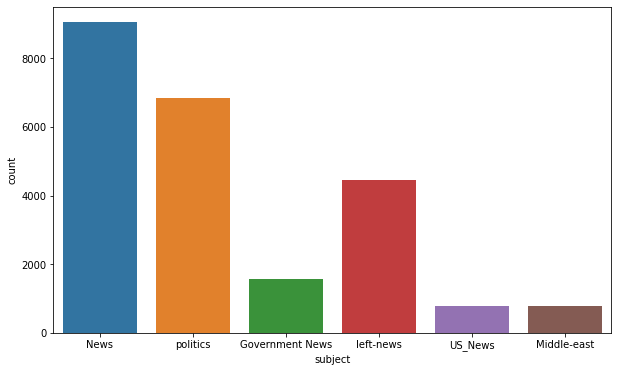

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


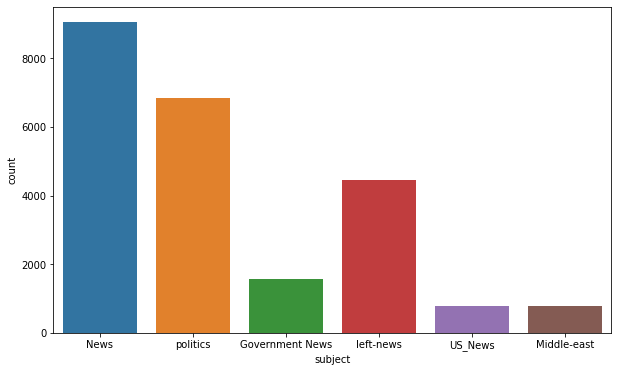

In [ ]:
# we can visualise in a graph 
# subject is the column to plot this graph with
plt.figure(figsize=(10, 6))
sns.countplot('subject', data=false)

**Using Wordcloud**

In [ ]:
# here we're going to use wordcloud to visualise text data

# from the fake data set, we combine all the text data under column 'text'
# 1 item of this list corresponds to a row of the fake data set
false['text'].tolist()

# however, we don't want a list for our text data. we want it to be a single text data
# what this code does is every list element is joined with a space
text = ' '.join(false['text'].tolist())

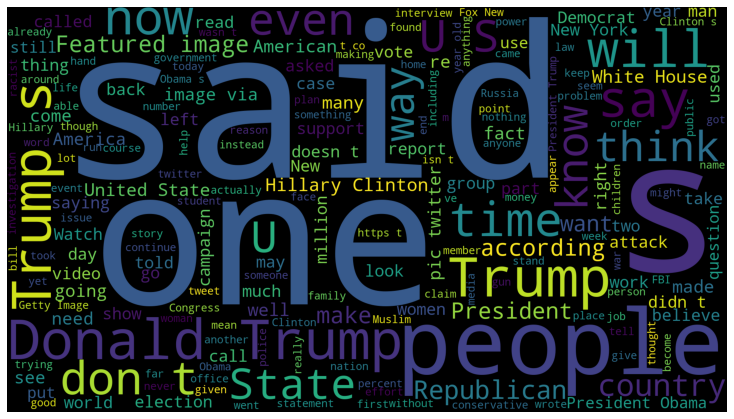

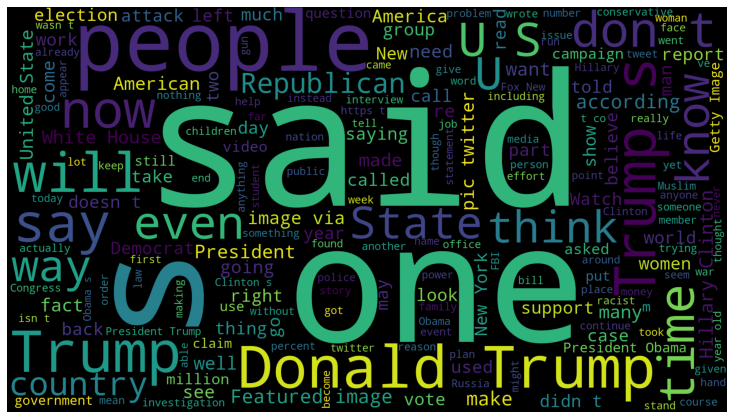

In [ ]:
# now we can use wordcloud
wordcloud = WordCloud(width=1920, height=1080).generate(text)
# visualise the wordcloud
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
# don't show axis
plt.axis('off')
# don't put padding
plt.tight_layout(pad=0)
plt.show()

# **Importing real news data sets and data visualisation**

In [ ]:
# read fake dataset into a frame data
true = pd.read_csv("https://raw.githubusercontent.com/A-Alviento/mlda-deep-learning-week-hackathon/main/Data%20Sets/True.csv")

# what this code does is every list element is joined with a space
text_true = ' '.join(true['text'].tolist())

**Using Wordcloud**

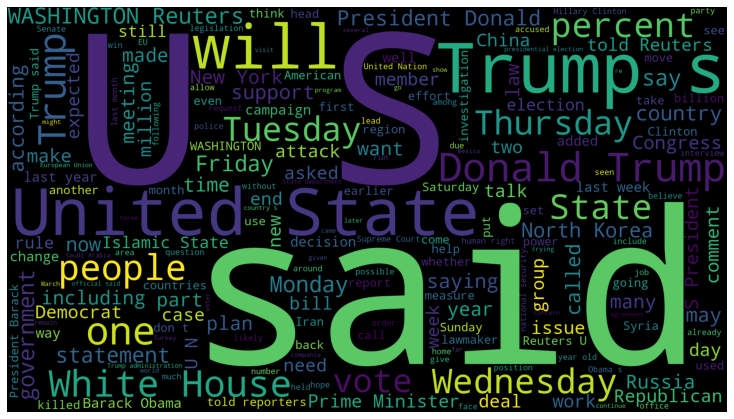

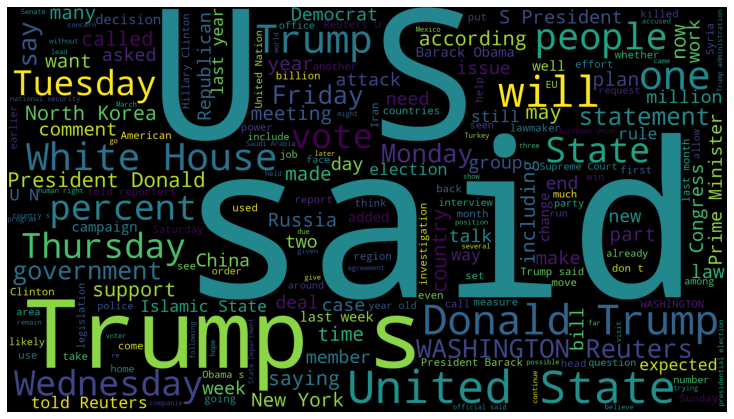

In [ ]:
# now we can use wordcloud
wordcloud = WordCloud(width=1920, height=1080).generate(text_true)
# visualise the wordcloud
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
# don't show axis
plt.axis('off')
# don't put padding
plt.tight_layout(pad=0)
plt.show()

# **Cleaning Data Set**

In [ ]:
# show us what some random 5 real articles
true.sample(5)

,title,text,subject,date
10059,"Mexico replaces top U.S. diplomats, citing hos...",MEXICO CITY (Reuters) - Mexico’s government on...,politicsNews,"April 5, 2016"
15079,Italy's populist 5-Star strengthens lead after...,MILAN (Reuters) - The outcome of local electio...,worldnews,"November 11, 2017"
639,"House backs $700 billion defense policy bill, ...",WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"November 14, 2017"
15301,"Bomb kills three, including senior police offi...","QUETTA, Pakistan (Reuters) - A suicide bomber ...",worldnews,"November 9, 2017"
3108,State Department presses North Korea to releas...,WASHINGTON (Reuters) - The United States holds...,politicsNews,"June 20, 2017"


,title,text,subject,date
6124,U.S. Supreme Court rejects Texas appeal over v...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"January 23, 2017"
20804,Irma wreaks 'absolute devastation' on Caribbea...,MEXICO CITY (Reuters) - Hurricane Irma left a ...,worldnews,"September 6, 2017"
19983,"Turkey, Iran and Russia to deploy observers in...","ANKARA (Reuters) - Russia, Iran and Turkey hav...",worldnews,"September 15, 2017"
1467,U.S. civil liberties group to challenge Trump'...,WASHINGTON (Reuters) - The American Civil Libe...,politicsNews,"September 29, 2017"
7510,Russia to bar U.S. diplomats from monitoring i...,MOSCOW (Reuters) - The Russian Foreign Ministr...,politicsNews,"November 8, 2016"


"(Reuters) - " is abundant in real articles -> indicates publication source



In [ ]:
# Create list of index with no publication information on the article
unknown_pub = []
# true.text.values is an array of text values from real
for index, row in enumerate(true.text.values):
  # if no hyphen in text data -> exception -> handle 
  try:
    record = row.split('-', maxsplit=1)
    # if there is hyphen, check if news comes from a tweet (contains < 120 chars)
    assert(len(record[0]) < 120)
    # this is another check to see if there is actually text after the hyphen '-', if not we just throw it in along with the unknown publishers
    record[1]
  # either record = row.split... or assert(len...) will produce error and either way, both are handled here
  except:
    # if we come to this exception, then this current record has no data or it's a tweet
    unknown_pub.append(index)


In [ ]:
# let's see how many unknown published articles are there
len(unknown_pub)

222

222

In [ ]:
# let's see the text data of this unknown publishers
true.iloc[unknown_pub].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
# remove the row with no text data
true = true.drop(8970, axis=0)

In [ ]:
publisher = []
tmp_text = []

# we iterate the real articles 
for index, row in enumerate(true.text.values):
  # if our index matches the unknown publishers, we run this code to indicate that it has unknown publishers
  if index in unknown_pub:
    tmp_text.append(row)
    publisher.append('Unknown')
  # if it's a known publisher
  else:
    # We split the text at '-' and we assume everything to the left is the publisher and the right is the article
    record = row.split('-', maxsplit=1)
    # We append record[0] which is the assumed publisher to the publisher[] 
    # and the record[1] which is the assumed text to the tmp_text[]
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
# replace the text data with just the text data and publisher with the publisher
true['publisher'] = publisher
true['text'] = tmp_text

In [ ]:
# let's see what it looks like now
true.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
# we get total 21416 rows
true.shape

(21416, 5)

(21416, 5)

In [ ]:
# checks fake dataset for empty text and gives us the list of index rows with empty data
empty_fake_index = [index for index, text in enumerate(false.text.tolist()) if str(text).strip == ""]

In [ ]:
false.iloc[empty_fake_index]

,title,text,subject,date


,title,text,subject,date


**Combining title and the text columns together**

In [ ]:
# here we just combine the text for title and text for text together in both true and false articles
true['text'] = true['title'] + " " + true['text']
false['text'] = false['title'] + " " + false['text']

**Convert data into small data**

In [ ]:
# convert to lowercase
true['text'] = true['text'].apply(lambda x: str(x).lower())
false['text'] = false['text'].apply(lambda x: str(x).lower())

# **Preprocessing Text**

**Labelling**

In [ ]:
# we need to label the real news and the fake news
true['class'] = 1
false['class'] = 0

In [ ]:
true.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
# let's combine the columns together, we only need the text and class
true = true[['text', 'class']]
false = false[['text', 'class']]

In [ ]:
# combine both data sets
data = true.append(false, ignore_index=True)

In [ ]:
# let's look at a random sample 
data.sample(5)

,text,class
36747,very funny video: sarah palin advises trump to...,0
2294,"puerto rico oversight board orders furloughs, ...",1
21293,poland tells eu its overhaul of judiciary in l...,1
15197,south korea says will provide financial suppor...,1
24801,"trump bails on teleprompter, insults his own ...",0


,text,class
20861,lebanon identifies soldiers killed in islamic ...,1
31521,breaking news: watch violent antifa cowards at...,0
21811,a florida pizza hut to irma-fleeing employees...,0
43210,(video) madness in the streets: over 100 cops ...,0
16493,"kazakhstan to re-examine 2004 banker's death, ...",1


**Removing special characters**

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==-0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 5.2 MB/s 
     |████████████████████████████████| 2.2 MB 40.1 MB/s 
     |████████████████████████████████| 184 kB 49.5 MB/s 
     |████████████████████████████████| 3.7 MB 59.6 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.8
    Uninstalling blis-0.7.8:
      Successfully uninstalled blis-0.7.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: sp

In [ ]:
import preprocess_kgptalkie as ps

# removes all special characters
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


# **Vectorisation**

**We need to convert our dataset into numerical data**

In [ ]:
# we use vectorisation technique - word2vec to convert a word into a sequence of vectors
import gensim

In [ ]:
# get array of class
y = data['class'].values
# data['text'].tolist turns text data into a sequence of list, which we need to convert into a list of words
x = [i.split() for i in data['text'].tolist()]

In [ ]:
# type of x is a list, type of x[0] is also a list
print(x[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
# each word is converted into a seq of 100 vectors
dim = 100
# creat a gensim model
# sentences are the list of the list, x, the size is dim, window shows us how many words are connected together, min_count means even if there is only 1 word it generates a vecor for that
w2v = gensim.models.Word2Vec(sentences=x, size=dim, window=10, min_count=1)

In [ ]:
# how many words are in w2v vocabulary after we vectorised x
len(w2v.wv.vocab)

231872

231872

In [ ]:
# shows the vectors assigned to word 'singapore'
w2v.wv['singapore']

array([ 1.59366024e+00,  9.20080900e-01, -8.31100166e-01,  1.18130557e-01,
        2.88529694e-01, -1.53657585e-01,  3.78479600e-01, -1.35789454e-01,
       -2.12228632e+00,  3.15053314e-01, -6.37361482e-02, -9.68912423e-01,
       -4.79253411e-01,  8.42113495e-01, -1.10764876e-01, -1.04715049e+00,
       -1.13658242e-01,  4.13096696e-02, -2.17391178e-01, -9.76734683e-02,
        1.43045962e+00, -1.68118751e+00,  1.72378257e-01, -1.33929753e+00,
       -1.27402973e+00,  1.07034028e+00, -1.47470164e+00,  1.58244357e-01,
       -7.47220516e-01, -1.38808519e-01, -1.08819211e+00, -8.93676460e-01,
       -3.77004266e-01,  9.05061960e-01, -8.06533039e-01,  7.45831788e-01,
       -1.37005031e+00,  3.80662352e-01, -1.72372341e+00,  4.75042433e-01,
       -2.64687753e+00,  1.31003093e-02,  6.94996178e-01, -9.02045146e-02,
       -4.71256018e-01,  7.62891591e-01, -2.01287699e+00,  7.15274692e-01,
       -1.18358219e+00,  5.49773574e-01,  6.73287988e-01, -1.96604759e-01,
       -1.30286670e+00, -

array([ 1.216497  ,  1.2343167 , -0.29018465, -0.6234059 , -0.9598874 ,
       -0.45518467,  0.36198786, -0.98232615, -1.7583317 ,  0.7089732 ,
       -1.5650287 , -0.4325828 , -0.6275543 ,  1.4041444 , -0.18276164,
       -1.4858946 , -0.44480464, -0.35982242, -0.31324455, -0.6500981 ,
        1.067405  , -0.6354632 ,  0.5136236 , -1.1952492 , -1.3882939 ,
       -0.12952775, -1.817936  ,  0.4951228 , -0.45900652, -0.6773655 ,
       -1.1023295 , -1.5722029 , -0.31599003,  0.5205837 , -0.4671777 ,
       -0.72357017, -1.360408  , -0.54574376, -1.012022  , -0.15201128,
       -0.9817523 ,  0.6631851 , -0.85597837, -0.43394652,  0.7709315 ,
        1.1266626 , -0.96210027,  0.9533067 , -1.3805137 ,  1.592074  ,
        1.5255612 ,  0.43606365, -1.5578785 , -1.0379605 , -0.39480433,
        0.4523906 , -0.35270166,  0.8734538 , -0.47362405,  1.1668988 ,
       -0.71039134, -0.5096428 , -0.29154727, -1.0331299 ,  1.0586593 ,
        0.40861896,  0.18549915,  1.1682063 ,  0.05807453,  0.41

In [ ]:
# returns words most similar to 'singapore' based on vectorisation
w2v.wv.most_similar('singapore')

[('malaysia', 0.7167195081710815),
 ('yang', 0.6892061233520508),
 ('thai', 0.6563866138458252),
 ('kongbased', 0.6535797119140625),
 ('thailand', 0.6488032341003418),
 ('indian', 0.6463202238082886),
 ('shanghai', 0.6394773721694946),
 ('kuala', 0.6317276954650879),
 ('kong', 0.6223102807998657),
 ('lumpur', 0.621161699295044)]

[('malaysia', 0.6949008703231812),
 ('shanghai', 0.6658716201782227),
 ('thai', 0.6569523811340332),
 ('xuan', 0.6297796964645386),
 ('yang', 0.6191617250442505),
 ('ltd', 0.6166709661483765),
 ('vinh', 0.6144360303878784),
 ('thailand', 0.6132569909095764),
 ('malaysian', 0.6128338575363159),
 ('fei', 0.6118198037147522)]

In [ ]:
# returns words most similar to 'hello' based on vectorisation
w2v.wv.most_similar('hello')

[('bye', 0.6661551594734192),
 ('adorable', 0.6444747447967529),
 ('cookies', 0.6393045783042908),
 ('gd', 0.6391853094100952),
 ('mon', 0.6296272873878479),
 ('ikaw', 0.6219254732131958),
 ('goat', 0.619490921497345),
 ('halloween', 0.6163808107376099),
 ('marmite', 0.6108862161636353),
 ('hmmmm', 0.6104201674461365)]

[('fuck', 0.6399263739585876),
 ('hey', 0.6146441698074341),
 ('gosh', 0.608362078666687),
 ('fucking', 0.6038527488708496),
 ('adele', 0.6005738973617554),
 ('adorable', 0.6003791689872742),
 ('pictwittercomflvaokudlw', 0.5975793600082397),
 ('umm', 0.5904671549797058),
 ('em', 0.5783846378326416),
 ('grandma', 0.5772196054458618)]

In [ ]:
# now our text is converted into vectors
# we can feed these vectors as initial weight in machine learning model, and then use the machine learning to recreate this weights again

# create tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
# after tokenisation, text data is converted into a set of sequence
x = tokenizer.texts_to_sequences(x)


In [ ]:
# we get the word index using here
# for e.g. a number is assigned to any word
# for some text, we just substitute the word for the index based on this assignment
# note index of this starts from 1

# this list the assigned index to each word
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

In [ ]:
# get the length for every list in x, i.e. number of words in each article
[len(i) for i in x]

[753,
 628,
 464,
 382,
 860,
 599,
 543,
 137,
 101,
 74,
 404,
 623,
 102,
 186,
 359,
 450,
 696,
 179,
 394,
 218,
 527,
 910,
 415,
 364,
 693,
 375,
 350,
 268,
 75,
 434,
 177,
 228,
 95,
 337,
 1110,
 839,
 554,
 469,
 466,
 99,
 178,
 324,
 582,
 72,
 409,
 365,
 617,
 358,
 85,
 403,
 81,
 962,
 656,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 244,
 849,
 370,
 628,
 649,
 1300,
 430,
 398,
 142,
 212,
 1108,
 75,
 74,
 588,
 850,
 758,
 788,
 347,
 694,
 482,
 416,
 84,
 419,
 127,
 1383,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 349,
 228,
 80,
 322,
 427,
 347,
 561,
 415,
 854,
 92,
 333,
 136,
 198,
 408,
 91,
 1124,
 995,
 386,
 115,
 73,
 437,
 598,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 161,
 292,
 392,
 428,
 401,
 717,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 509,
 407,
 249,
 723,
 767,
 231,
 420,
 433,
 545,
 420,
 365,
 310,
 831,
 686,
 89,
 99,
 108,
 360,
 87,
 58,
 294,
 225,
 285,
 370,
 108,
 462,
 580,
 943,
 1067,
 263,
 462,
 464,
 499,
 89,
 534,
 

[753,
 628,
 464,
 382,
 860,
 599,
 543,
 137,
 101,
 74,
 404,
 623,
 102,
 186,
 359,
 450,
 696,
 179,
 394,
 218,
 527,
 910,
 415,
 364,
 693,
 375,
 350,
 268,
 75,
 434,
 177,
 228,
 95,
 337,
 1110,
 839,
 554,
 469,
 466,
 99,
 178,
 324,
 582,
 72,
 409,
 365,
 617,
 358,
 85,
 403,
 81,
 962,
 656,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 244,
 849,
 370,
 628,
 649,
 1300,
 430,
 398,
 142,
 212,
 1108,
 75,
 74,
 588,
 850,
 758,
 788,
 347,
 694,
 482,
 416,
 84,
 419,
 127,
 1383,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 349,
 228,
 80,
 322,
 427,
 347,
 561,
 415,
 854,
 92,
 333,
 136,
 198,
 408,
 91,
 1124,
 995,
 386,
 115,
 73,
 437,
 598,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 161,
 292,
 392,
 428,
 401,
 717,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 509,
 407,
 249,
 723,
 767,
 231,
 420,
 433,
 545,
 420,
 365,
 310,
 831,
 686,
 89,
 99,
 108,
 360,
 87,
 58,
 294,
 225,
 285,
 370,
 108,
 462,
 580,
 943,
 1067,
 263,
 462,
 464,
 499,
 89,
 534,
 

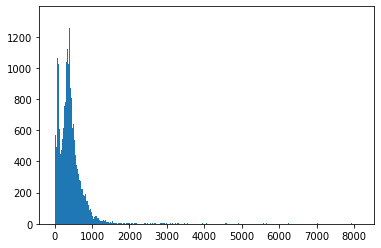

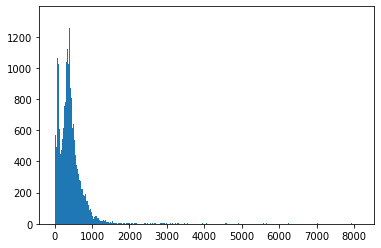

In [ ]:
# now we analyse our text data using a histogram
plt.hist([len(i) for i in x], bins = 700)
plt.show()
# we see that mostly the words are less than a 1000 for each article

In [ ]:
# create array to indicate number of words for article i
nos = np.array([len(i) for i in x])
# count numer of articles with word count > 1000
len(nos[nos>1000])

1581

1581

In [ ]:
# we create a threshold of word limit
maxlen = 1000
# when sequence is more than 1000, truncate, if less than 1000 pad it
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
# now len of any sequence is 1000
len(x[3])

1000

1000

In [ ]:
# we put +1 as there are many words that may not come in the tokens
# for those words, we consider those as unknown words which creates another sequence
vocab_len = len(tokenizer.word_index) + 1
# voc takes on the tokenizer.word_index which represents the word to index conversion
voc = tokenizer.word_index

In [ ]:
# feed vectors as the initial weight in the machine learning model and then we use the machine learning model to retrain this weight to find the maximum accuracy
def get_weight_matrix(model):
  # weight matrix for the words
  weight_matrix = np.zeros((vocab_len, dim))
  for word, i in voc.items():
    # assign the weight
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
weight_matrix = get_weight_matrix(w2v)

In [ ]:
# gives us shape of the matrix
weight_matrix.shape

(231873, 100)

(231873, 100)

In [ ]:
w2v.wv

In [ ]:
# so all in all, the weight_matrix represents a weight_matrix
# i-th element is the array of dim-sized vectors assigned to the word with i-th index as tokenisation
# in this case, 1 represents the word 'the'
weight_matrix[1]

array([ 0.50649202,  1.16485572, -3.04025364, -2.41387844, -0.03924682,
       -0.98590529, -1.90282845, -2.26025105,  0.43672135,  1.70071769,
        0.58682883, -1.1032145 , -0.58721858, -0.82670653,  0.73930383,
       -0.32497352, -2.57697034, -1.23217523,  2.24314952,  2.35143113,
       -0.34258121, -0.50187284, -2.59947777,  0.88650054, -0.64595258,
        1.66429961,  2.98088312, -2.32003093, -1.57773256, -0.13860625,
       -0.91793108, -2.83832502,  1.51790631, -1.42260361, -1.86443102,
       -1.68980157, -0.51064473, -1.86932313,  0.8521592 , -1.96238768,
       -0.27251536, -0.1099261 , -0.46274254, -1.20816791,  0.05600041,
        2.18318605, -0.80998886,  0.29047108,  0.22821441,  2.00830173,
       -1.01622272,  1.01099157, -0.54925704,  2.32705426,  2.05412674,
        1.8698591 ,  0.80779177,  1.22444975,  2.65685463, -2.39361024,
        0.67744219,  1.53110814, -0.21891747,  0.77853131,  0.82252783,
       -1.558635  , -2.25966001, -2.60949254,  2.44182372, -0.16

array([ 2.196697  ,  1.17926657, -1.77464581, -1.84961987,  3.04255223,
        0.24253741, -1.61227274, -1.66916597,  0.07571546, -1.53356147,
        1.40723634, -1.76619029,  0.26714328, -1.03254604, -1.39012754,
        1.22660923, -1.43396258, -2.6281836 ,  0.7218039 ,  1.59873235,
        1.65835238,  2.17692208, -3.23284531, -0.68950599, -0.60079747,
        0.25818616,  2.99764824, -0.59692633, -2.72634101,  0.64208055,
       -0.44735762, -2.38122725,  1.22504461,  0.17191021, -4.68062496,
       -0.56336862, -0.33835962, -0.83134025,  0.67882836, -0.39101201,
       -2.08838844, -0.72009474, -0.02205599, -3.60860491, -0.32345417,
        1.82917404,  0.89365077,  1.19613421, -0.08107395,  0.55271631,
       -1.59380448,  1.9248935 , -1.00774968,  4.24101448,  0.59851468,
        1.26100683,  2.28468561,  0.39039236,  0.58849245, -1.27658653,
        2.54213452,  1.28962755,  1.31148541, -1.08322954,  0.76295745,
       -0.63648385, -0.48990795,  0.12774847,  0.60658401,  0.52

# **Simple machine learning model**

Sequential model is one of two different approaches we can use in building our models in tensorflow.

Sequential model is good for simple sequential stacks of layers where each layers has one input, and one outpus.

Most models are made of layers, layers are functions with known mathematical structure that can be reused and have trainable variables.

In [ ]:
# here we create our machine learning model; we create an instance of the Sequential Class
model = Sequential()

# model layers are subsequently added to it

# here we add an embedding layer - first arg is number of distinct words in training set; second arg is size of embedding vector (dim of vectorisation); 
# third arg is just our array of weights for the words; fourth arg is the size of each input sequence; last arg indicates if we want our weight_matrix
# to be trainable, i.e. to adapt according to the machine learning
model.add(Embedding(vocab_len, output_dim=dim, weights = [weight_matrix], input_length=maxlen, trainable=True))

# here we add a long short-term memory layer. lstm is a special version of RNN which solves short term memory problem
# unit refers to the dimensionality of the output space, which is the dimension of the hidden state vector a that is the
# state output from RNN cell
model.add(LSTM(units=128))

# adding a dense layer. 
# first arg represents the number of units and it affects the output layer; second arg represents the activation function
# here we are using sigmoid as the activation function and it guarantees that the output of this unit will always be between 0 and 1
model.add(Dense(1, activation='sigmoid'))

# compile the model since we already defined it
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 23,304,677
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23187300  
                                                                 
 lstm_1 (LSTM)        

In [ ]:
# split data sets into training and testing sets
# recall x is the text and y is the class 
x_train, x_test, y_train, y_test = train_test_split(x,y)

**Training**

In [ ]:
# training
model.fit(x_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 1145s 2s/step - loss: 0.1763 - acc: 0.9312 - val_loss: 0.0875 - val_acc: 0.9680
Epoch 2/6
737/737 [==============================] - 1137s 2s/step - loss: 0.0634 - acc: 0.9779 - val_loss: 0.0430 - val_acc: 0.9859
Epoch 3/6
737/737 [==============================] - 1129s 2s/step - loss: 0.0274 - acc: 0.9910 - val_loss: 0.0268 - val_acc: 0.9920
Epoch 4/6
737/737 [==============================] - 1130s 2s/step - loss: 0.0147 - acc: 0.9957 - val_loss: 0.0226 - val_acc: 0.9925
Epoch 5/6
737/737 [==============================] - 1129s 2s/step - loss: 0.0096 - acc: 0.9975 - val_loss: 0.0211 - val_acc: 0.9927
Epoch 6/6
737/737 [==============================] - 1134s 2s/step - loss: 0.0075 - acc: 0.9974 - val_loss: 0.0274 - val_acc: 0.9925


In [ ]:
# if model.predict(x_test) outputs a value above or equals to 0.5, we round up to 1, indicating that the model thinks article is real
prediction = (model.predict(x_test) >= 0.5).astype(int)

In [ ]:
accuracy_score(y_test, prediction)

0.9922494432071269

In [ ]:
output = model.predict(x_test)

In [ ]:
(output >= 0.5).astype(int)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

# **Test with real articles**

In [ ]:
# upload an md file of article
from google.colab import files
uploaded = files.upload()

In [ ]:
# conversion of md file into an array of a single string

import markdown
from bs4 import BeautifulSoup
html = markdown.markdown(open("The Straits Times (6).md").read())
test = "".join(BeautifulSoup(html).findAll(text=True))

test1 = ""
for c in test:
  if (c.isalpha() or c==" "):
    test1+=c
  else:
    test1+=" "

test1 = test1.lower()
x = [test1]
x

FileNotFoundError: ignored

In [ ]:
# conversion of test file into "testable" sequence

test = "Insert some spam to test it out!"
test1 = ""
for c in test:
  if (c.isalpha() or c==" "):
    test1+=c
  else:
    test1+=" "
test1 = test1.lower()
x = [test1]

x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
x

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
# generate probability prediction of fake or real
# 1 is real 0 is fake
model.predict(x)

array([[0.98058045]], dtype=float32)